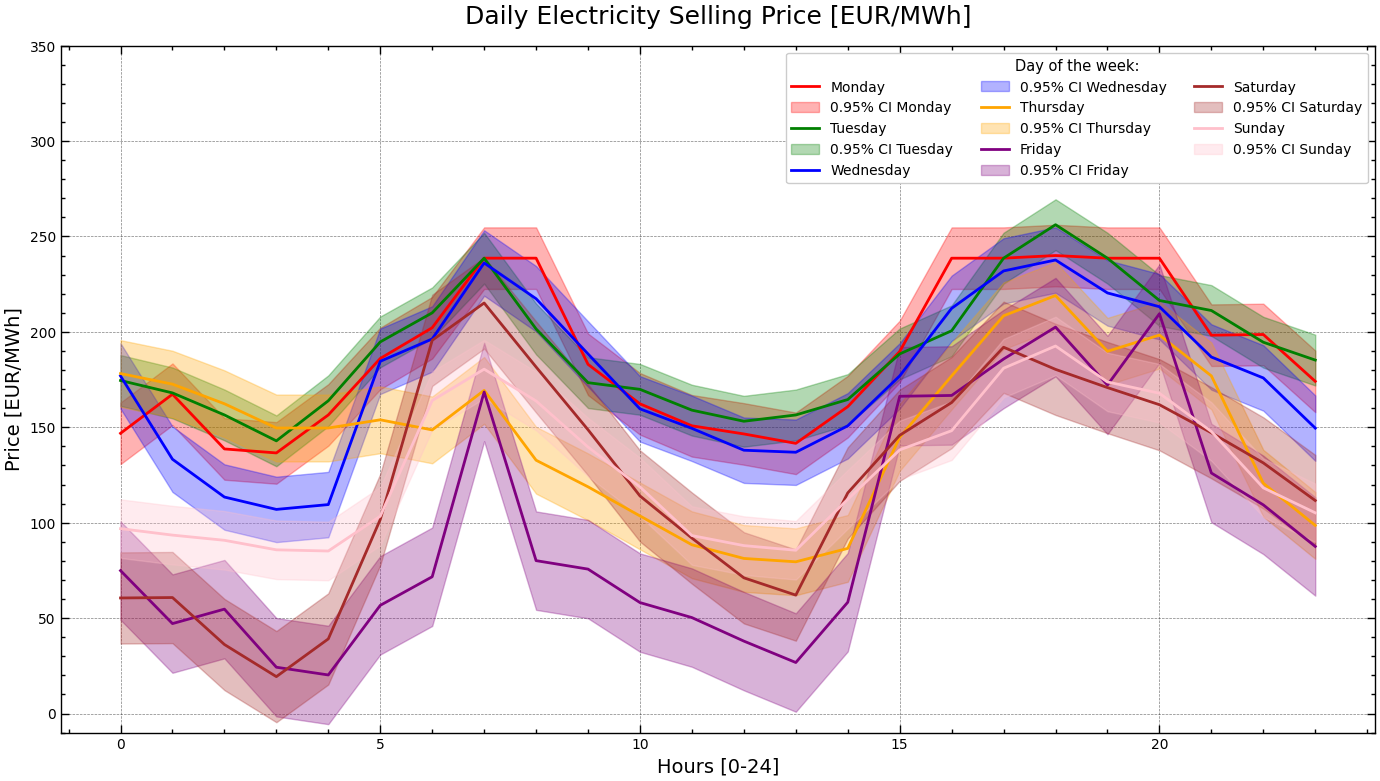

In [82]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
import sys
import os

from matplotlib import animation
from matplotlib.animation import PillowWriter

from scipy.optimize import minimize, curve_fit
from scipy.interpolate import interp1d
from scipy.special import legendre, jv # Legendre Shrodinger polynomial and Laplace Bessel function

from matplotlib.font_manager import FontProperties
from numpy.polynomial.polynomial import Polynomial

import scienceplots

plt.style.use(["science", "notebook", "grid"])

from scipy.stats import norm


local_path = os.getcwd()


# --------------------------------------------------------------------------------------------------------------------------------


class ElectricitySellingPriceOverWeek:
    
    DAYS_DICT = {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday"
    }
    
    COLORS = ["red", "green", "blue", "orange", "purple", "brown", "pink"]

    HOURS_ARRAY = np.arange(24)

    
# --------------------------------------------------------------------------------------------------------------------------------

    
    def __init__(self, weekly_selling_price,  confidence_interval = 0.95):
        
        self.confidence_interval = confidence_interval
        self.weekly_selling_price = weekly_selling_price
        
        self.ci_lower_array = []
        self.ci_upper_array = []

    
# --------------------------------------------------------------------------------------------------------------------------------

    
    def calc_confidence_intervals(self):
        for day in range(self.weekly_selling_price.shape[0]): 
            hourly_data = self.weekly_selling_price[day]
            self.calc_confidence_intervals_for_day(hourly_data)


# --------------------------------------------------------------------------------------------------------------------------------

    
    def calc_confidence_intervals_for_day(self, hourly_data):
        """
        Calculate confidence intervals for a single day's hourly data.
        
        Parameters:
        hourly_data (1D array): Hourly data for a single day.
        confidence (float): Confidence level for the interval.
        
        Returns:
        ci_lower (1D array): Lower bounds of the confidence intervals for each hour.
        ci_upper (1D array): Upper bounds of the confidence intervals for each hour.
        """
        ci_lower = np.zeros(len(hourly_data))
        ci_upper = np.zeros(len(hourly_data))
        
        # Loop over each hour in the day's data
        for hour in range(len(hourly_data)):
            # Since we're dealing with single values per hour, simulate a distribution
            # Here, you might want to adjust based on your actual data distribution or use a different method
            # This is a placeholder step; for real data, consider bootstrapping or another method as needed
            sem = scipy.stats.sem(hourly_data) if len(hourly_data) > 1 else 0
            h = sem * scipy.stats.t.ppf((1 + self.confidence_interval) / 2, len(hourly_data)-1)
            mean = hourly_data[hour]
            ci_lower[hour], ci_upper[hour] = mean - h, mean + h
        
        if ci_lower[hour] < 0:
            ci_lower[hour] = 0
        
        self.ci_lower_array.append(ci_lower)
        self.ci_upper_array.append(ci_upper)

    
# --------------------------------------------------------------------------------------------------------------------------------

    
    def print_calc_confidence_intervals(self):
        plt.figure(figsize=(14, 8))
        
        for day in range(self.weekly_selling_price.shape[0]):  # Iterate through each day
            ci_lowers, ci_uppers = self.ci_lower_array[day], self.ci_upper_array[day]
            
            plt.plot(ElectricitySellingPriceOverWeek.HOURS_ARRAY, self.weekly_selling_price[day, :],\
                     label=f"{ElectricitySellingPriceOverWeek.DAYS_DICT[day]}",\
                     color=ElectricitySellingPriceOverWeek.COLORS[day % len(ElectricitySellingPriceOverWeek.COLORS)])
            plt.fill_between(ElectricitySellingPriceOverWeek.HOURS_ARRAY,\
                             ci_lowers, ci_uppers, color=ElectricitySellingPriceOverWeek.COLORS[day % len(ElectricitySellingPriceOverWeek.COLORS)],\
                             alpha=0.3, label=f'{self.confidence_interval}% CI {ElectricitySellingPriceOverWeek.DAYS_DICT[day]}')
        
        plt.title('Daily Electricity Selling Price [EUR/MWh]', fontsize=18, y = 1.02)
        plt.xlabel('Hours [0-24]', fontsize=14)
        plt.ylabel('Price [EUR/MWh]', fontsize=14)
        plt.legend(title="Day of the week:", title_fontproperties=FontProperties(size=10.5), fontsize=10, loc="upper right", ncol=3)
        plt.grid(True)
        plt.tick_params(axis = 'both', labelsize = 10)
        plt.ylim(-10, 350)
        plt.tight_layout()
        plt.savefig("images\\ElectricitySellingPriceOverWeek.png")
        plt.show()


# --------------------------------------------------------------------------------------------------------------------------------


if __name__ == "__main__":

    data_points = [
        [146.84, 174.52, 176.89, 178.16, 74.89, 60.55, 96.87],
        [167.32, 168.01, 133.25, 172.6, 47.12, 60.77, 93.49],
        [138.65, 156.47, 113.44, 162.33, 54.7, 36.16, 90.77],
        [136.56, 142.89, 106.96, 149.62, 24.25, 19.32, 85.78],
        [156.47, 163.9, 109.49, 149.62, 20.2, 39.1, 85.16],
        [186.06, 194.74, 184.57, 153.92, 56.68, 101.66, 103.42],
        [202.17, 209.98, 196.29, 148.62, 71.66, 195.58, 164.04],
        [238.63, 238.61, 236.11, 169.34, 168.49, 215.14, 180.46],
        [238.63, 201.53, 217.37, 132.74, 80.11, 181.6, 163.8],
        [182.99, 173.38, 188.42, 118.8, 75.67, 148.7, 139.63],
        [162.29, 169.88, 159.65, 103.54, 58.13, 114.01, 118.74],
        [150.77, 158.97, 149.43, 88.42, 50.26, 91.92, 93.25],
        [146.51, 153.16, 137.98, 81.26, 37.94, 71.11, 87.99],
        [141.58, 156.45, 136.91, 79.5, 26.72, 62.04, 85.55],
        [160.81, 164.54, 150.76, 86.53, 58.32, 115.61, 112.26],
        [189.72, 188.44, 176.92, 144.73, 166.25, 145.81, 138.14],
        [238.61, 200.59, 212.34, 176.92, 166.68, 162.98, 148.21],
        [238.63, 238.63, 231.94, 208.43, 185.78, 191.95, 180.95],
        [240, 256.16, 237.67, 219.05, 202.51, 180.35, 192.59],
        [238.61, 238.61, 220.4, 189.81, 172.17, 170.8, 173.76],
        [238.61, 216.45, 213.19, 198.32, 209.51, 161.83, 167.83],
        [198.26, 211.19, 186.82, 176.92, 126.03, 147.12, 147.78],
        [198.63, 194.57, 175.85, 120.67, 109.33, 131.33, 118.27],
        [174.07, 185.22, 149.56, 98.57, 87.54, 111.62, 105.18],
    ]
    
    # Creating a numpy array from the list
    data_array = np.array(data_points).T  # 24 rows (hours) and 7 columns (days)
    confidence_interval = 0.95
    
    
    selling_price = ElectricitySellingPriceOverWeek(data_array, confidence_interval)
    selling_price.calc_confidence_intervals()
    selling_price.print_calc_confidence_intervals()


sys.path.append(f"{local_path}\\ElectricitySellingPriceOverWeek.ipynb")

In [83]:
import nbformat
from nbconvert import PythonExporter

def convert_notebook(notebook_path, output_path):
    with open(notebook_path) as fh:
        nb = nbformat.read(fh, as_version=4)
        exporter = PythonExporter()
        source, meta = exporter.from_notebook_node(nb)
        with open(output_path, 'w+') as fh:
            fh.writelines(source)

convert_notebook(f'{local_path}\\ElectricitySellingPriceOverWeek.ipynb', f'{local_path}\\ElectricitySellingPriceOverWeek.py')